# Build the model that detect Traffic Sign

#### In this project, we will use Convolutional Neural Network to build train and test a traffic sign classification model. We will build this model using tensorflow and keras. It is a multiclass classification problem. This model can be used to make smarter cars.

Following are key features used in this example

- Multi Classification problem
- Supervised learning
- Neural Network model (CNN - Convolutional Neural Netwrok)
- GPU intensive process
- Unstructured Data (images)
- Higher accuracy score
- sklearn, keras and tensorflow libraries
- Google colab for developing the notebook


It is intended to be an end-to-end example of what a data science and deep learning **proof of concept** might look like.

## What is multi classification?

Multi-class or multinomial classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification). In our case we will have around 40K images classified into more than 40+ classes. 

## Steps we will follow

* **Setup environment with GPU and get the Data** - Required steps for running the code on google colab.  
* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Building and Training Model** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Make prediction** - testing our model with the unseen data.

As we mentioned that we are going to use Artificial Neural Network model that is Convolutional Neural Network for this problem, we will go through in details during the step 3 where we will build and train our CNN model.

**Note: i have build the notebook on my laptop with CPU, however i will provide instructions to run the same notebook on google colab as a GPU resources for faster processing. S


## 1. Problem Definition
In our case, the problem we will be exploring is **multi classification** . 

This is because we're going to be using a number of different **features** in a image to predict a class for a traffic sign.

In a statement,

> Given the two traffic sign image, can we describe the sign on that image, for example ?

## 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Kaggle](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign).

The original database contains 43 classes, also called **target variable** and around 40k images for training and validation.

following are the key features in the dataset:

* Single-image, multi-class classification problem
* More than 40+ classes
* More than 40,000 images in total
* Large, lifelike database

### Download the dataset

You can download the dataset locally from here: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Downloading on google drive for colab access, please follow these instructions:

1. mount your google drive to store dataset - google colab in virtual environment that will start when you open your notebook in colab and will be destroy when you exist, therefore providing permanent persistence require you to save you data in google drive and connect that to your colab env. 

`# Running this cell will provide you with a token to link your drive to this notebook
from google.colab import drive
drive.mount('/content/drive')`

2. To download dataset, you need kaggle access key file that you can download from you kaggle account page. Once you download the json file on you local system, using following command you can upload the same file in your colab env.

`# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()`

3. Next, install the Kaggle API client, and provide right permissions.

`!pip install -q kaggle`

`# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/`

`# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json`


4. Creating folder in google drive

`%cd /content/drive/MyDrive/data
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset`

5. Downloading dataset using kaggle api client

`!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign`

6. Unziping the downloaded file and removing extra or unwanted files/folders.

!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Now, you should have the data ready for use. 

Note: for local notebook, you can download the zip, unzip and remove the unwanted file and set the data folder as a IMAGE_PATH constant in the next step.

In [49]:
IMAGE_PATH = "/Users/amitmahajan/Desktop/heart-disease-project/data/traffic_sign_dataset/"

## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.
* [TensorFlow](https://www.tensorflow.org/) Build and train ML models easily using intuitive high-level APIs like Keras 

In [50]:
# Regular EDA and plotting libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random

# Image processing
from PIL import Image

# Slipting data into train and validation sets
from sklearn.model_selection import  train_test_split

# Applying one hot encoding to the target classes
from tensorflow.keras.utils import to_categorical

# Build and train CNN models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

### If you are running notebook on google colab using GPU, you can use following code to check whether GPU is enable or not.

1. You can enable GPU by selecting **Runtime** > **Change Runtime type** > **Select GPU in the dropdown** 
2. To check if GPU is enabled, run the following code:

`# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")`

### Check some of the Tet images by loading them

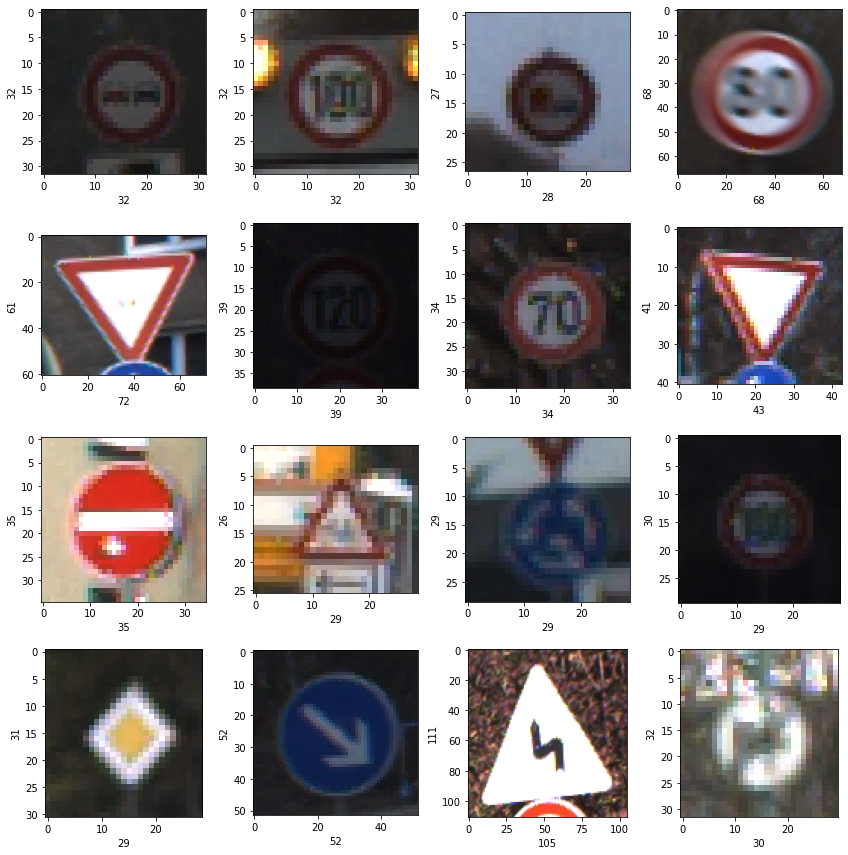

In [51]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = IMAGE_PATH +"/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [52]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = IMAGE_PATH +'/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [53]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [54]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = IMAGE_PATH + '/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [55]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [56]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [57]:
images.shape

(39209, 50, 50, 3)

In [58]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [59]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [60]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

## 3 Build Model (CNN)

### What is CNN 

Convolutional Neural Network (ConvNet or CNN) is a class of deep neural networks most commonly used for analyzing visual imagery. Convolution layers are the building blocks of the CNNs.

A convolution is the simple application of a filter to an input that results in an activation. Repeated application of the same filter to an input results in a map of activations called a feature map, indicating the locations and strength of a detected feature in an input, such as an image.

What makes CNNs so powerful and useful is that they can generate excellent predictions with minimal image preprocessing. Also, the CNNs are immune to spatial variance and hence are able to detect features anywhere in the input images. 

Let's take a following example, what do you see here?

<img src="images/cnn.png" width=300/>

if you see the right side of the image, you can see person is side face and looking away, but if you see the left side of the image, you can see person is looking front and that is because our mind is train based on the features it identifies. in this image eye, nose, ears etc. are the features that our mind identifies and therefore making decision based on the features it detects in the image. 

This is what a CNN tries to mimic for classifying Images.

Below is the Architecture Diagram of a Simple Convolutional Neural Network

<img src="images/CNN_Architecture.jpeg" width="800">

As you can see, a Convolutional Neural Network can be interpreted as two sub networks where each sub network is responsible for performing a specific task. These Subnetworks are — Feature Learning Net(The Eyes of our CNN) and Classification Net (The Brain of our CNN). Together they perform an approximate function of how a Human Brain classifies the Images.

* **Feature Learning** — The Feature Learning part mainly consist of Convolutional Layers and Pooling Layers.
* **Classification** — The classification part is responsible for classifying the images to their respective categories based on the features (Feature Maps) that Feature Learning part has extracted (created) from the image.

for full article on CNN please refer to following link [A Beginners Guide to Understand CNN](https://medium.com/swlh/convolutional-neural-networks-for-multiclass-image-classification-a-beginners-guide-to-6dbc09fabbd)

Based on the above description let build the CNN model for our problem.

In [61]:
model = Sequential()

# imput layer with feature size 3x3 and activation function is relu (Rectifier Linear Unit - to ad non-linerity)
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))

# adding maxpool that will be responsible for accounting any spatial variance that might effect the performance 
# of our network in Image Recognition.
model.add(MaxPool2D(pool_size=(2,2)))
# outputs of a layer under dropout are randomly subsampled, 
# it has the effect of reducing the capacity or thinning the network during training
model.add(Dropout(0.5))

## Adding the hidden layer in the network, input will be the waight from the first (input layer)
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

## Add final (output) layer 
# We flatten the output of the convolutional layers to create a single long feature vector. 
# And it is connected to the final classification model, which is called a fully-connected layer.
model.add(Flatten())
# the dense layer is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer.
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [62]:
# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)             

In [63]:
# Fitting model with Train and validation data with epoch set to 10
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 74s - loss: 2.3035 - accuracy: 0.3641 - val_loss: 0.9657 - val_accuracy: 0.7742
Epoch 2/10
246/246 - 68s - loss: 0.9352 - accuracy: 0.7088 - val_loss: 0.3561 - val_accuracy: 0.9320
Epoch 3/10
246/246 - 116s - loss: 0.5867 - accuracy: 0.8134 - val_loss: 0.2146 - val_accuracy: 0.9611
Epoch 4/10
246/246 - 71s - loss: 0.4478 - accuracy: 0.8574 - val_loss: 0.1607 - val_accuracy: 0.9676
Epoch 5/10
246/246 - 71s - loss: 0.3659 - accuracy: 0.8823 - val_loss: 0.1166 - val_accuracy: 0.9755
Epoch 6/10
246/246 - 73s - loss: 0.3116 - accuracy: 0.8999 - val_loss: 0.1010 - val_accuracy: 0.9818
Epoch 7/10
246/246 - 73s - loss: 0.2813 - accuracy: 0.9092 - val_loss: 0.0839 - val_accuracy: 0.9839
Epoch 8/10
246/246 - 70s - loss: 0.2567 - accuracy: 0.9165 - val_loss: 0.0739 - val_accuracy: 0.9875
Epoch 9/10
246/246 - 69s - loss: 0.2327 - accuracy: 0.9247 - val_loss: 0.0606 - val_accuracy: 0.9869
Epoch 10/10
246/246 - 69s - loss: 0.2092 - accuracy: 0.9332 - val_loss: 0.0554 - val_accur

<AxesSubplot:>

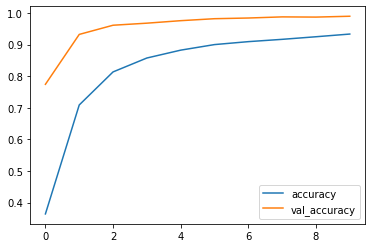

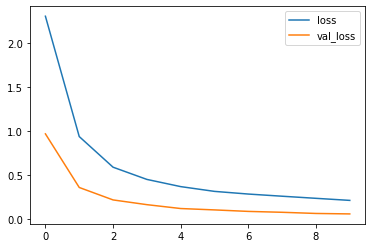

In [64]:
# Visualising accuracy and loss

evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

### Saving Model locally

In [67]:
#  Saves a given model in a models directory and appends a suffix (str)
#  for clarity and reuse.

import datetime

MODEL_PATH = "models/Traffic_Sign_Classification_CNN/"
# serialize model to JSON
model_json = model.to_json()
with open(MODEL_PATH + "model"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%s") +".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(MODEL_PATH + "model"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%s") + ".h5")
print("Saved model to disk")

Saved model to disk


### Predicting labels for test images

These are the images that our model has not seen yet.

In [68]:
# defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [70]:
!rm /Users/amitmahajan/Desktop/heart-disease-project/data/traffic_sign_dataset/Test/.DS_Store

test_images = scaling(sorted(os.listdir(IMAGE_PATH + "Test")),IMAGE_PATH + "/Test")

In [71]:
test = pd.read_csv(IMAGE_PATH + '/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

**Note:** You can continue using the model we build during the training phase or if you want to load the model we saved on the disk then use following code:

`# load json and create model
json_file = open('[REPLACE WITH YOUR FILE NAME].json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)`
`# load weights into new model
model.load_weights("[REPLACE WITH YOUR FILE NAME].h5")
print("Loaded model from disk")`
`# evaluate loaded model on test data
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])`

You can follow next steps:

In [72]:
y_pred = model.predict_classes(test_images);
y_pred

/Users/amitmahajan/opt/anaconda3/envs/heart-disease-project/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ..., 38,  7, 10])

In [73]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

In [74]:
# Visualize test image
img = Image.open(IMAGE_PATH + 'Test/00203.png')
img

In [75]:
# Original label
print("Original label : ",all_lables[y_test[203]])

Original label :  Speed limit (30km/h)


In [76]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[203]])

Predicted label :  Speed limit (30km/h)


## End of Project